In [753]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [754]:
df=pd.read_csv(r'day.csv')

### EDA

In [755]:
# Check for any missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [756]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [757]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [758]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [759]:
# dropping casual and registered columns as they are not features of dataset
df.drop('casual',axis=1, inplace=True)
df.drop('registered',axis=1, inplace=True)

# dropping instant as they are not required and dteday columns as it has same data as that of yr and mnth
df.drop('instant',axis=1, inplace=True)
df.drop('dteday',axis=1, inplace=True)

In [760]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [761]:
# mapping season, mnth, weathersit, yr, weekday to names to get a clear understanding during analysis that they are categorical columns

In [762]:
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [763]:
df['mnth'] = df['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [764]:
df['weathersit'] = df['weathersit'].map({1:'Clear', 2:'MistCloudy', 3:'LightSnow', 4:'HeavyRain'})

In [765]:
df['yr'] = df['yr'].map({0:'2018', 1:'2019'})

In [766]:
df['weekday']=df['weekday'].map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

In [767]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,0,Mon,0,MistCloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,0,Tues,0,MistCloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [768]:
df.shape

(730, 12)

In [769]:
# For visualization

## Univariate Analysis

In [770]:
num_cols=['temp','atemp','hum','windspeed','cnt']
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']

plot of : temp


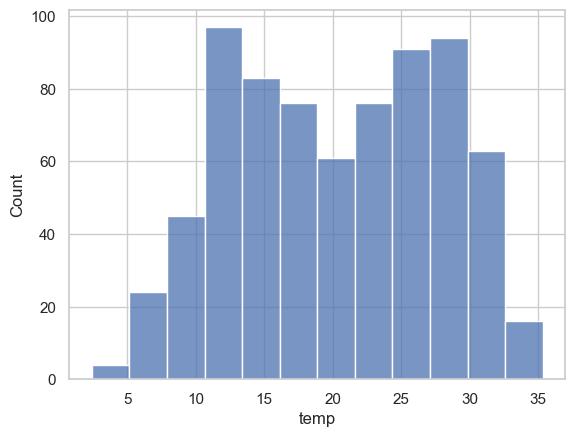

plot of : atemp


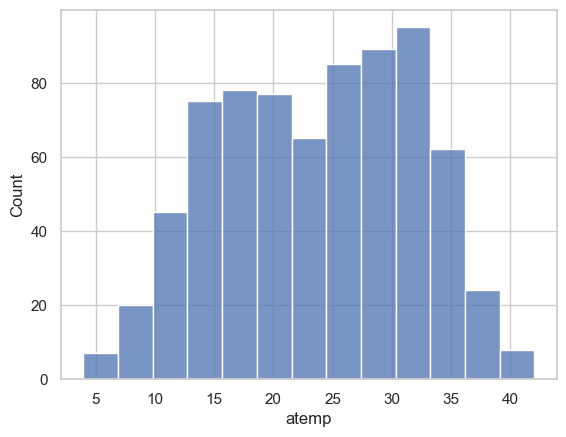

plot of : hum


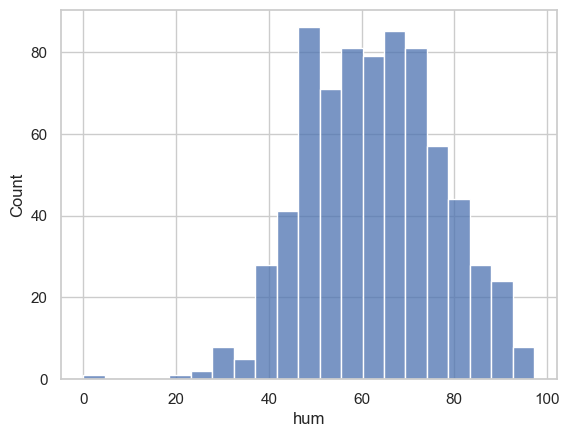

plot of : windspeed


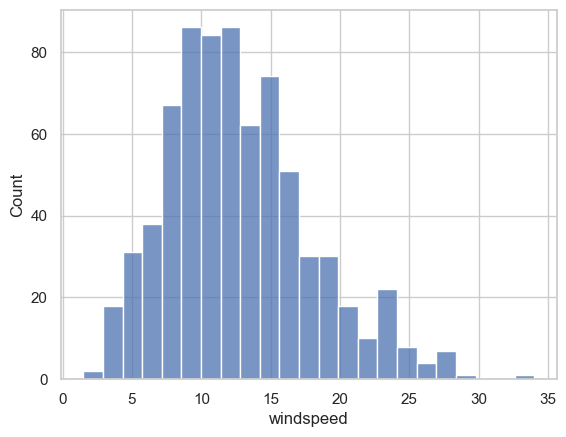

plot of : cnt


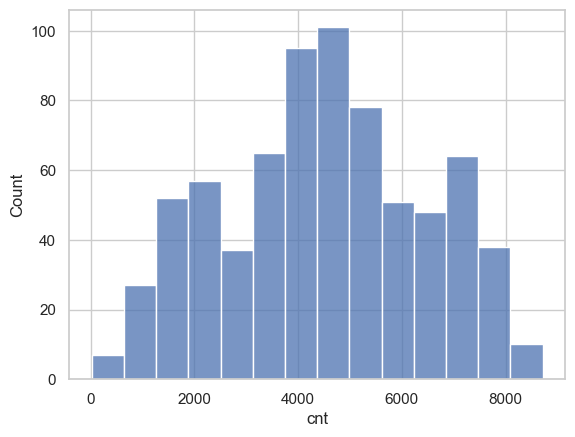

In [771]:
for each_col in num_cols:
    print("plot of : " + each_col)
    sns.histplot(x=df[each_col])
    plt.show()

plot of : temp


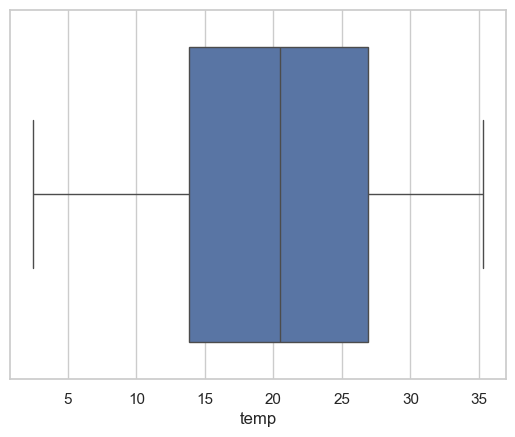

plot of : atemp


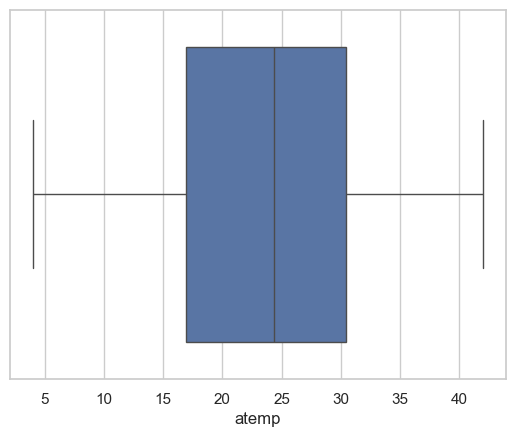

plot of : hum


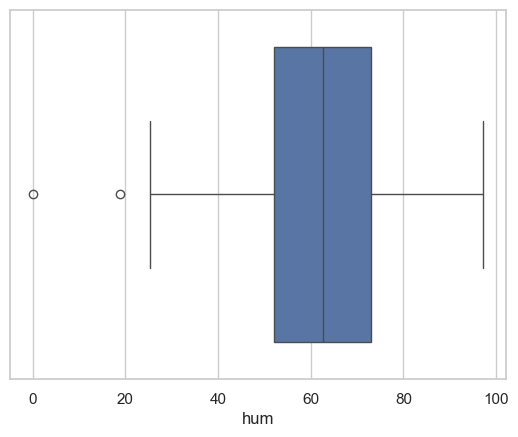

plot of : windspeed


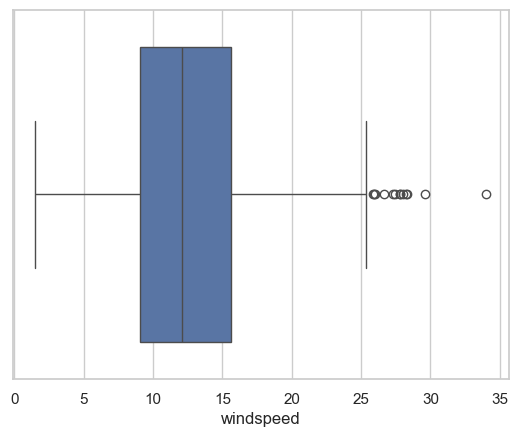

plot of : cnt


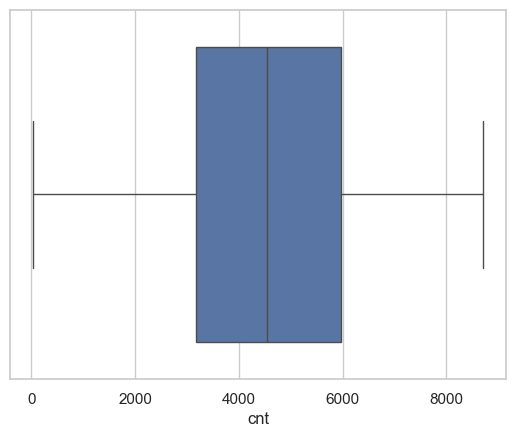

In [772]:
for each_col in num_cols:
    print("plot of : " + each_col)
    sns.boxplot(x=df[each_col])
    plt.show()

plot of: season


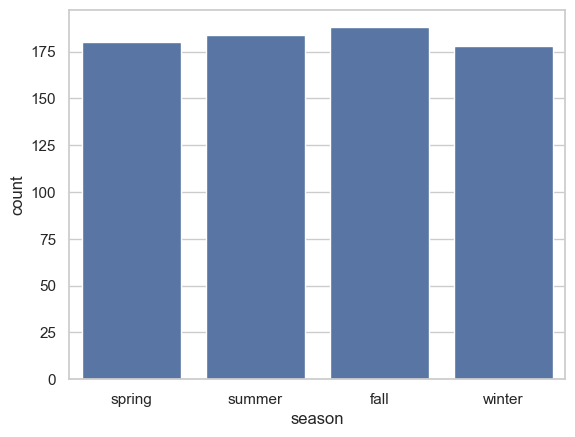

plot of: yr


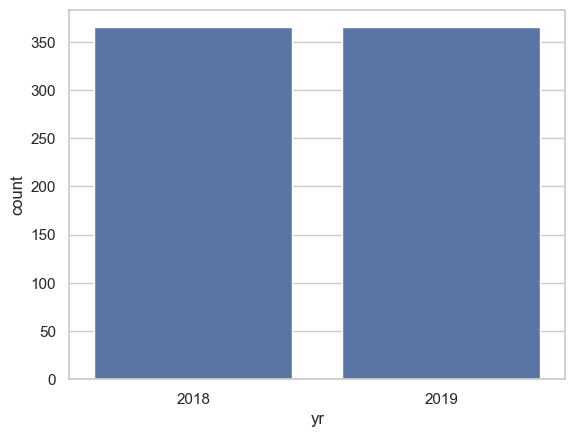

plot of: mnth


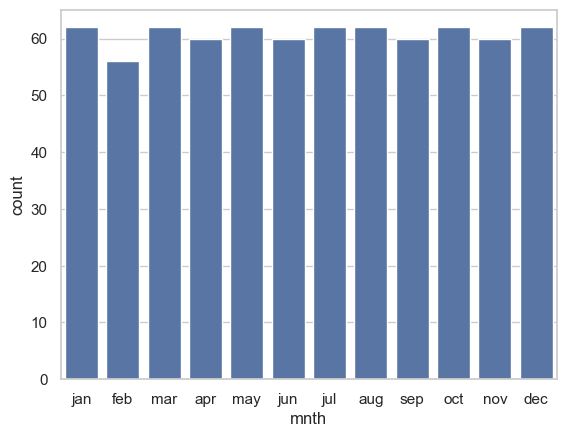

plot of: holiday


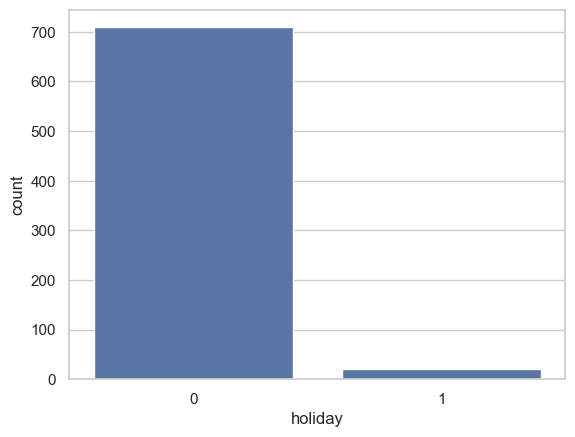

plot of: weekday


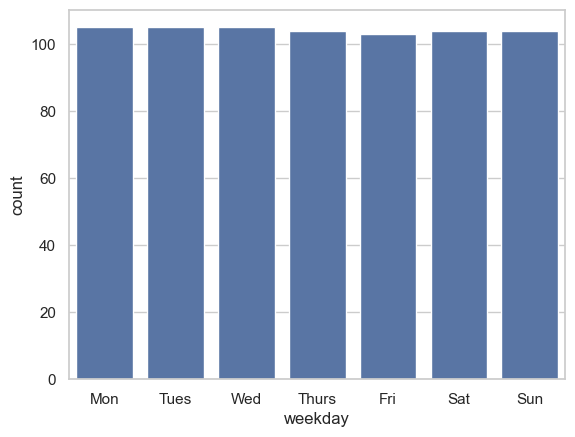

plot of: workingday


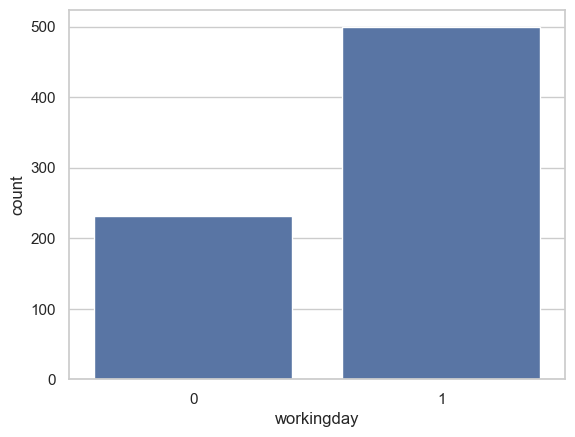

plot of: weathersit


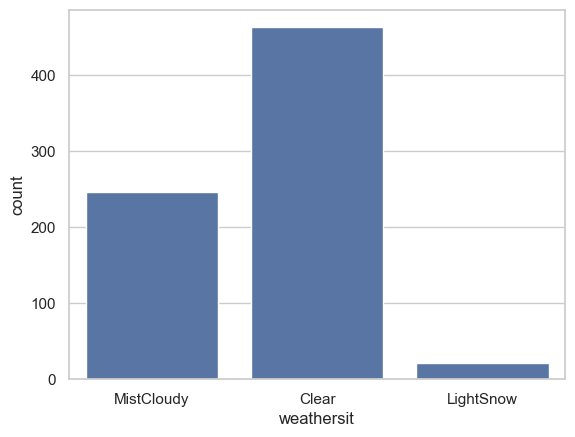

In [773]:
for each_col in cat_cols:
    print("plot of: " + each_col)
    sns.countplot(x=df[each_col])
    plt.show()

plot of: season


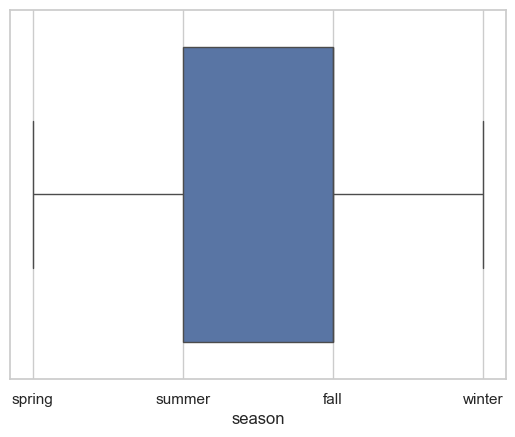

plot of: yr


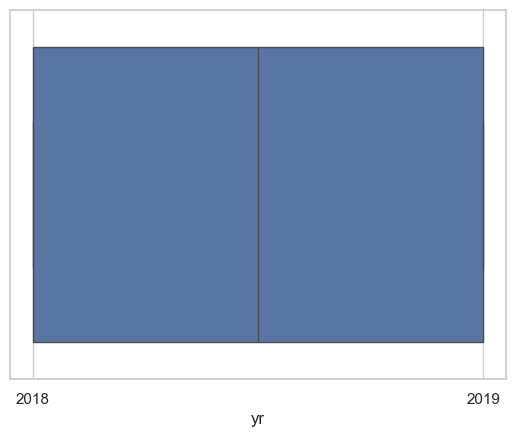

plot of: mnth


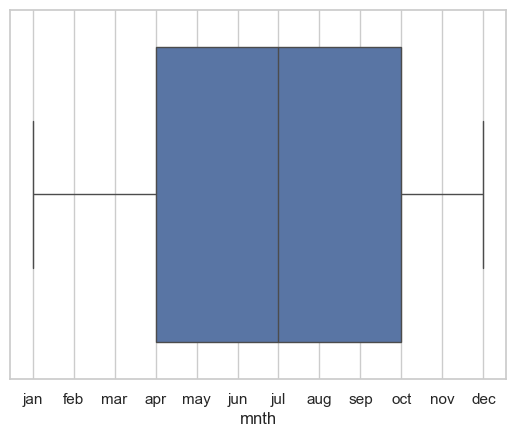

plot of: holiday


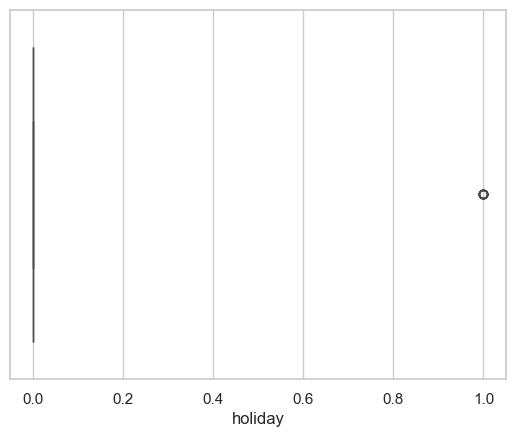

plot of: weekday


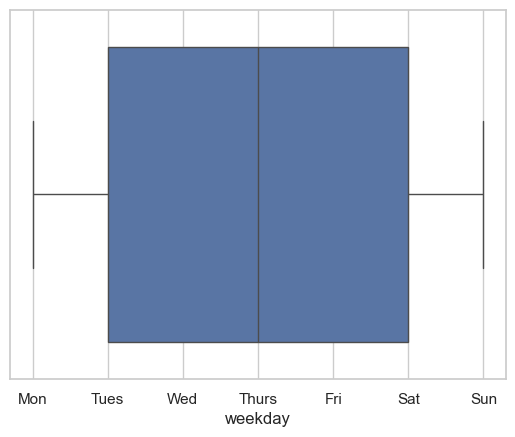

plot of: workingday


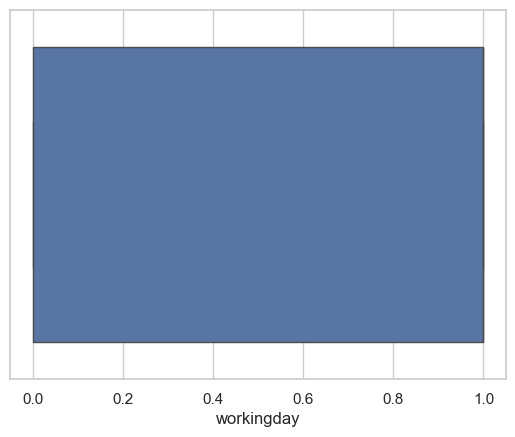

plot of: weathersit


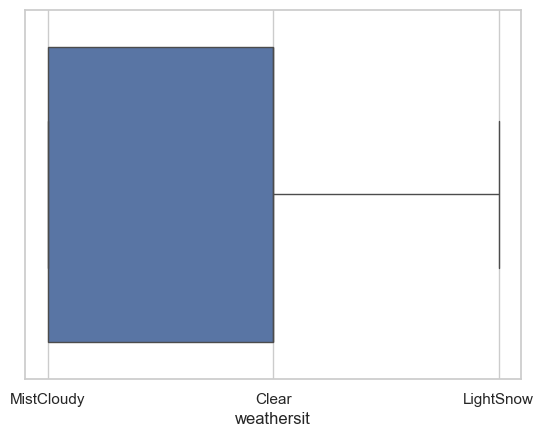

In [774]:
for each_col in cat_cols:
    print("plot of: " + each_col)
    sns.boxplot(x=df[each_col])
    plt.show()

In [775]:
### Univariate Analysis:
#### On working days almost two times of the bikes were rented compared to non working days
#### Most of the bikes were rented on non-holidays and a very minor number on holidays
#### Most of the bikes were rented on Clear, Few clouds, Partly cloudy, Partly cloudy followed by Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#### Bikes were rented almost same irrelevant of which Season, year, month, weekdays it is

<Figure size 800x600 with 0 Axes>

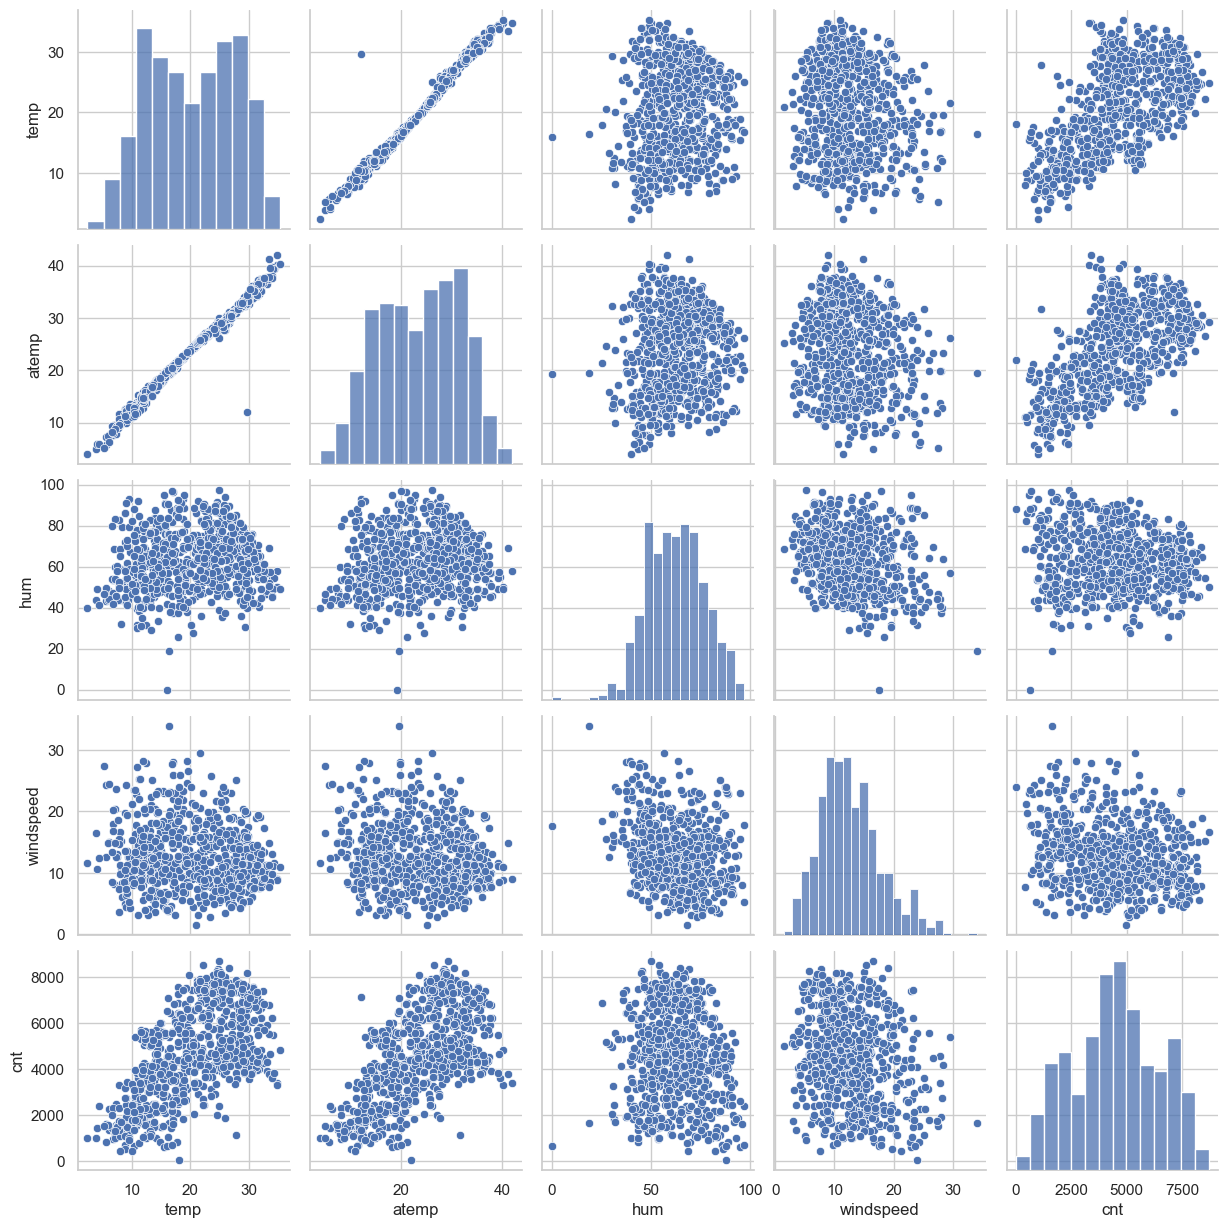

In [776]:
# pairplots b/w numerical columns
plt.figure(figsize = (8,6))
sns.pairplot(df[num_cols])
plt.show()

## Bivariate analysis

scatter plot between temp and atemp :


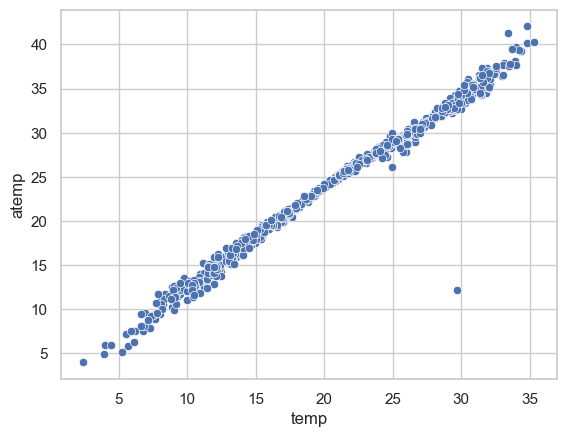

scatter plot between temp and hum :


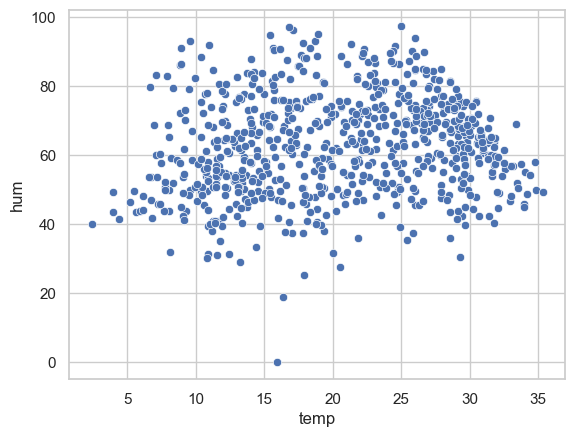

scatter plot between temp and windspeed :


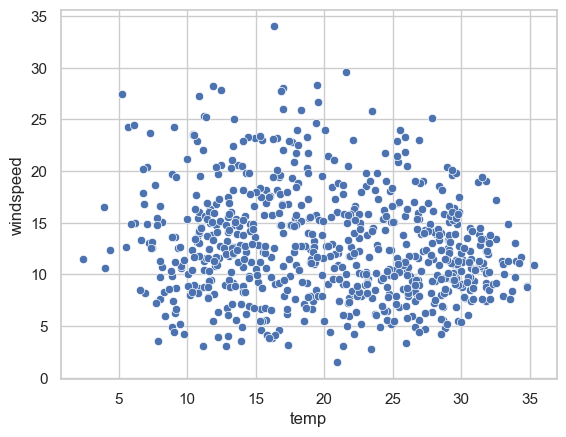

scatter plot between temp and cnt :


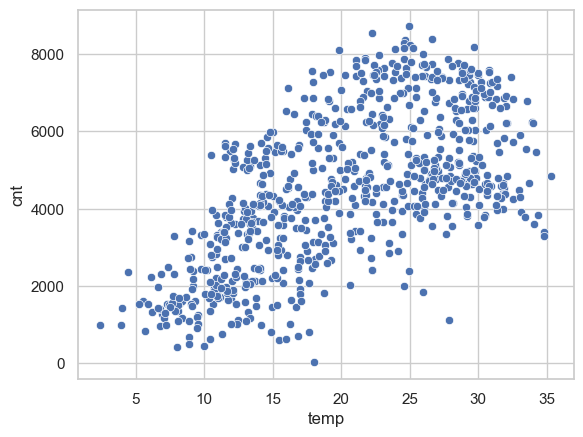

scatter plot between atemp and temp :


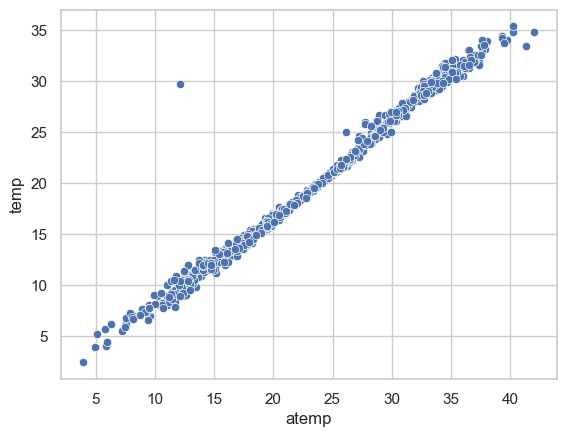

scatter plot between atemp and hum :


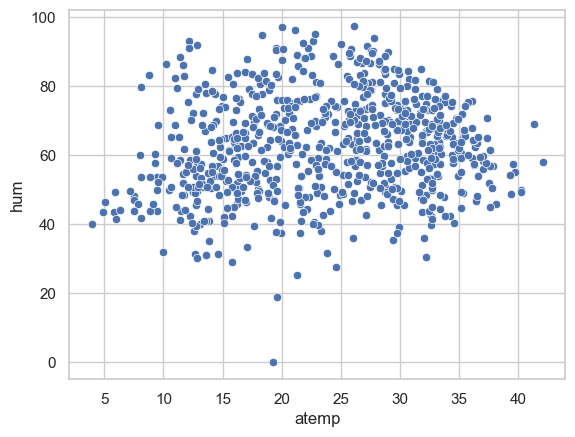

scatter plot between atemp and windspeed :


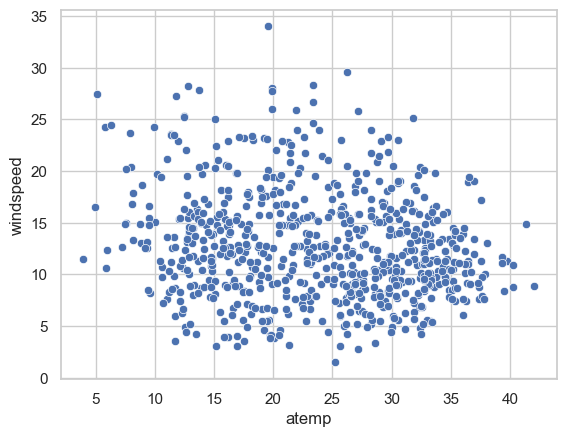

scatter plot between atemp and cnt :


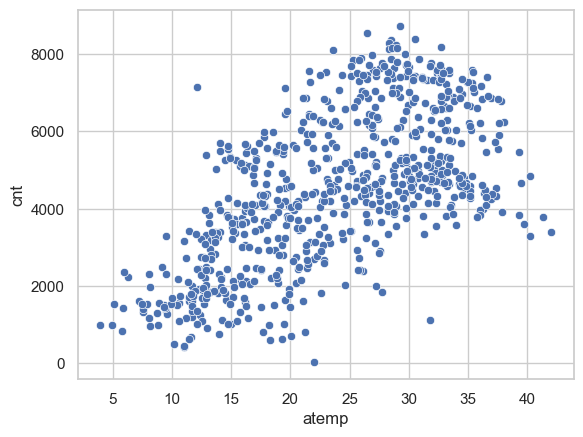

scatter plot between hum and temp :


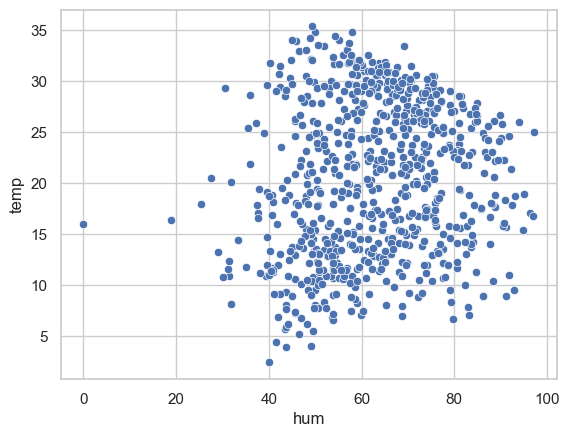

scatter plot between hum and atemp :


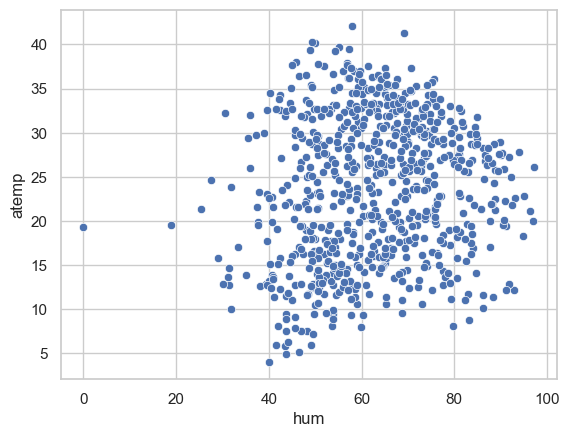

scatter plot between hum and windspeed :


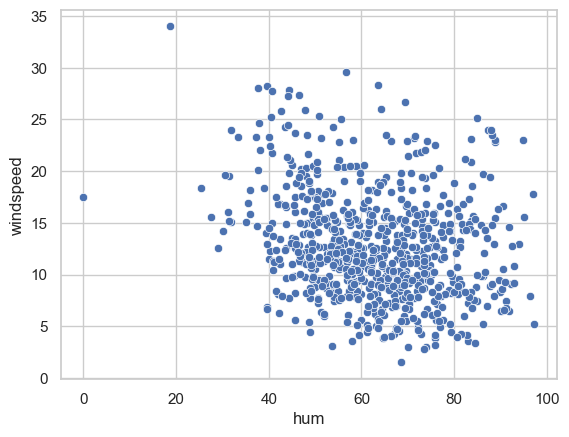

scatter plot between hum and cnt :


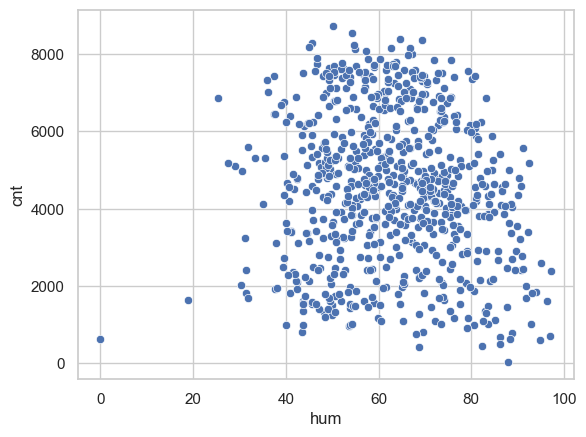

scatter plot between windspeed and temp :


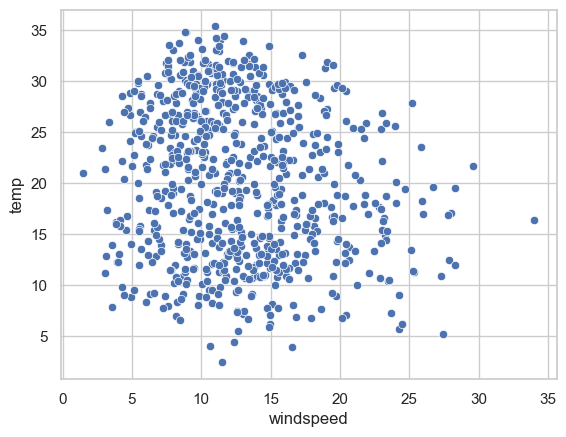

scatter plot between windspeed and atemp :


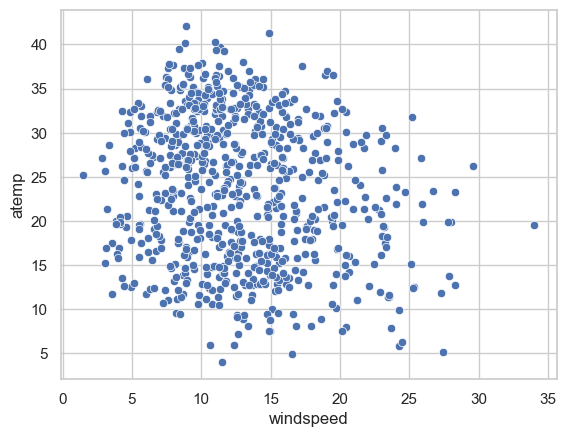

scatter plot between windspeed and hum :


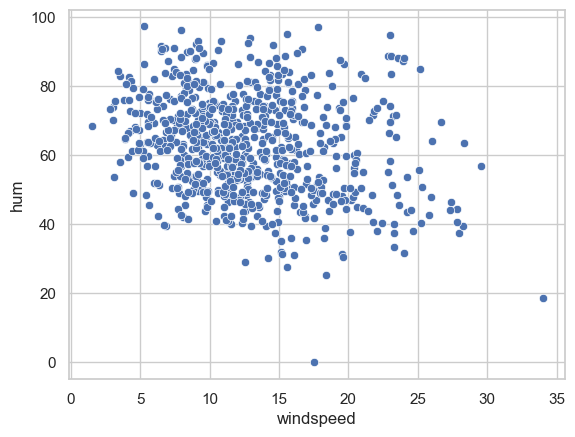

scatter plot between windspeed and cnt :


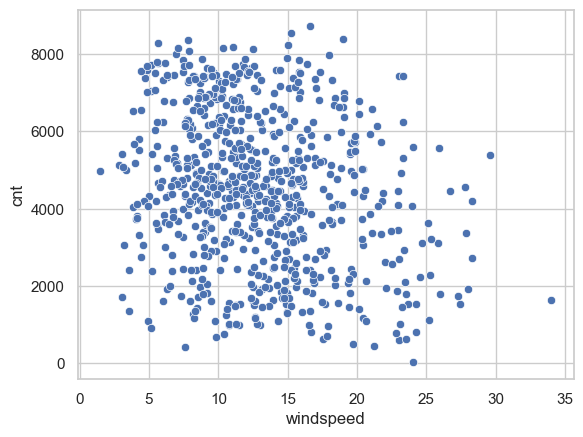

scatter plot between cnt and temp :


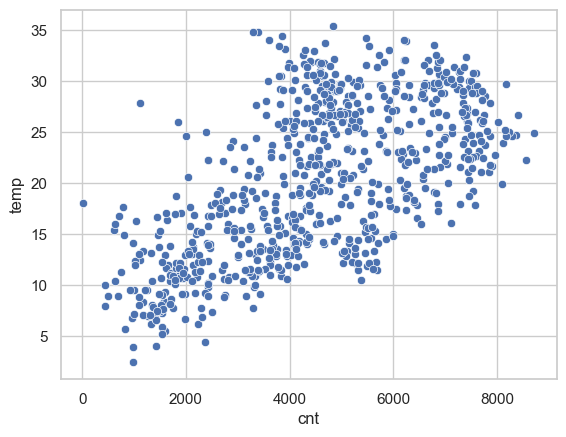

scatter plot between cnt and atemp :


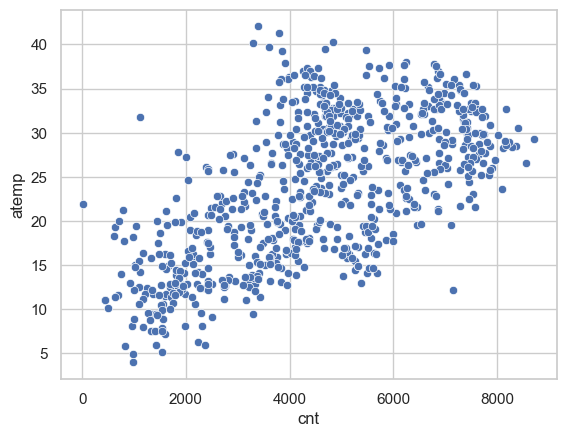

scatter plot between cnt and hum :


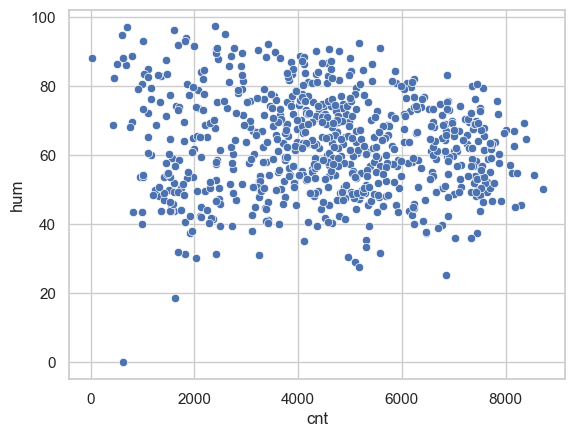

scatter plot between cnt and windspeed :


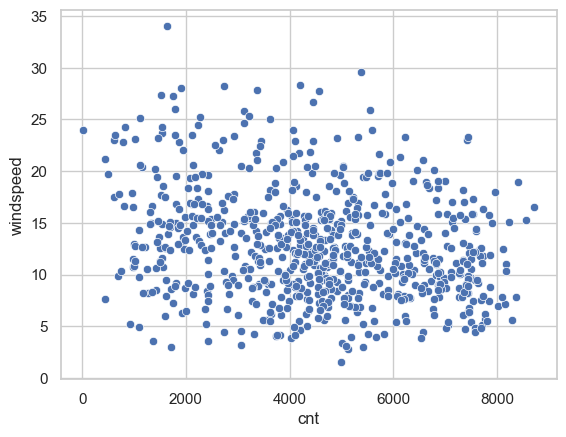

In [777]:
for i in num_cols:
    for j in num_cols:
        if i != j:
            print("scatter plot between "+i + " and " + j + " :")
            sns.scatterplot(x=df[i],y=df[j])
            plt.show()

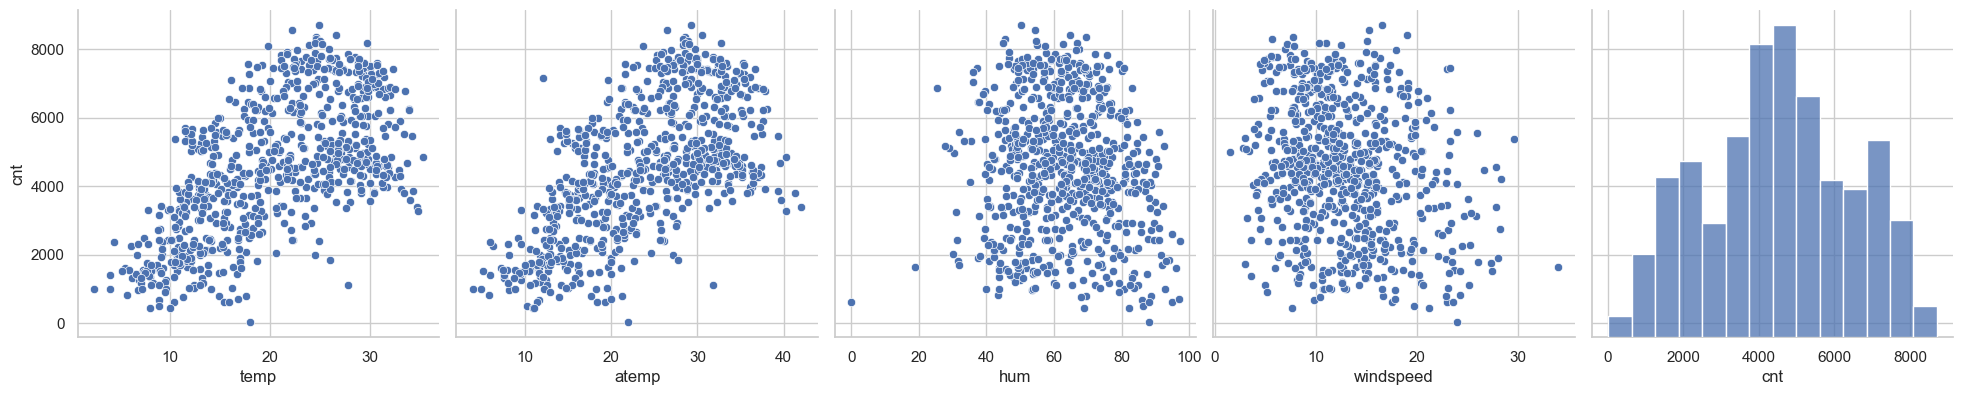

In [778]:
# no. of bikes rented relation with other variables using pair plot.
sns.pairplot(df, x_vars=num_cols, y_vars='cnt', height=4, aspect=1, kind='scatter')
plt.show()

In [779]:
### temp and atemp are directly proportional to each other
### temp and no. of bikes rented are proportional to each other
### also atemp and no. of bikes rented are proportional to each other


Text(0.5, 1.0, 'Distribution of rented bikes')

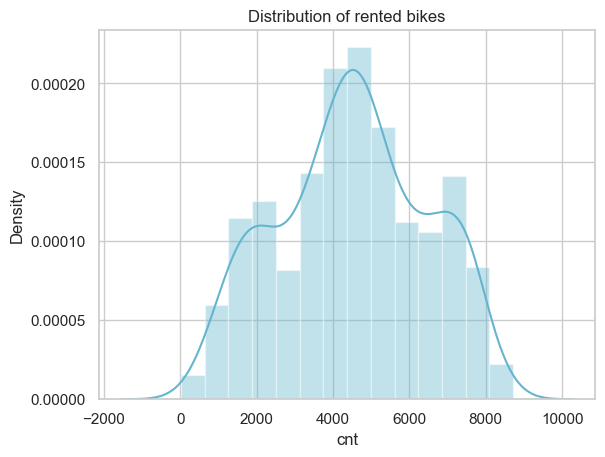

In [780]:
sns.distplot(df['cnt'], kde = True, color = 'c')
plt.title('Distribution of rented bikes')

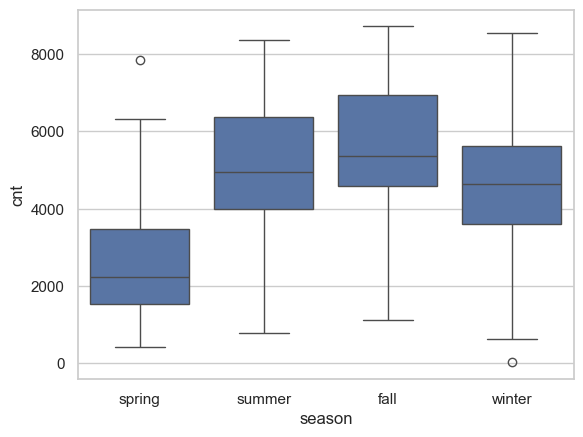

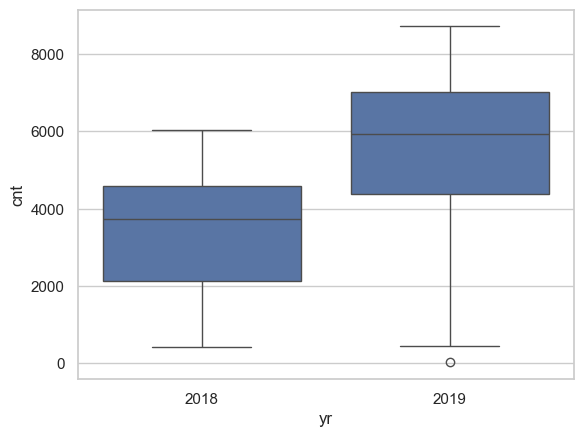

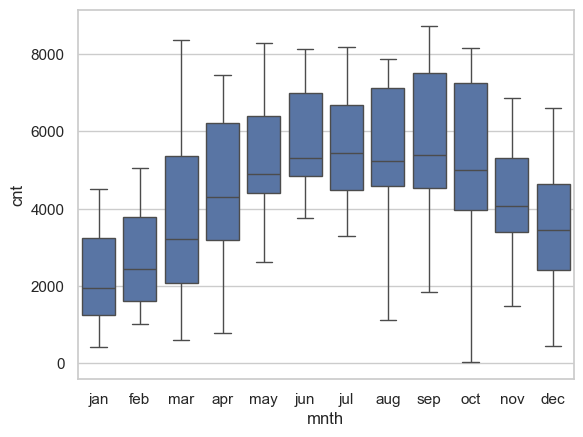

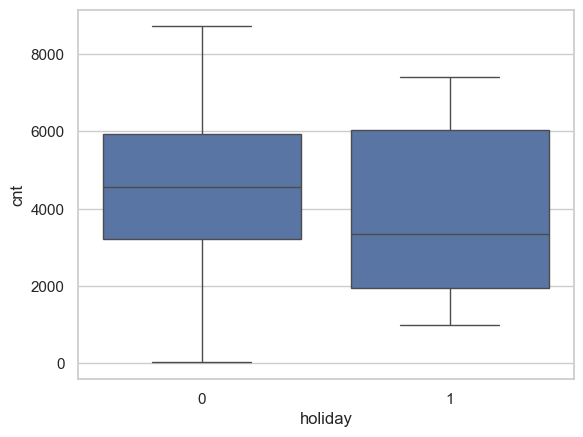

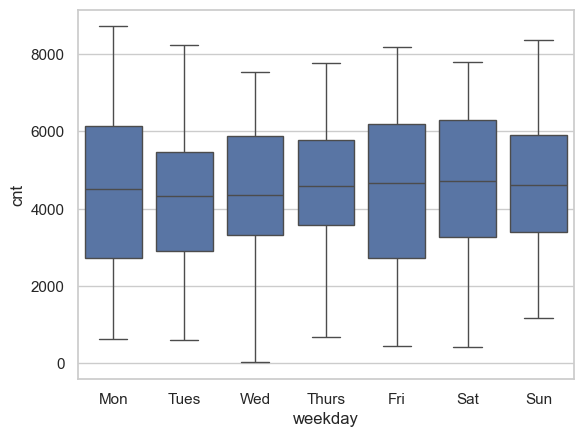

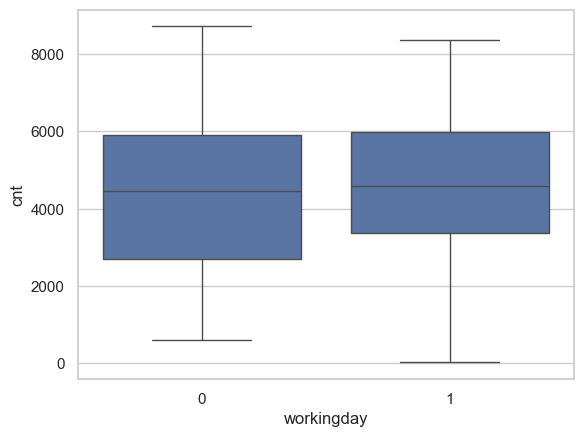

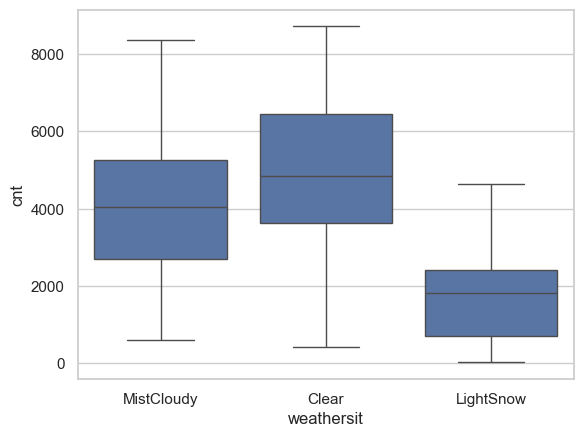

In [781]:
# no. of bikes rented relation with other categorical variables using box plot.
for each_cat_col in cat_cols:
    sns.boxplot(x=df[each_cat_col], y=df['cnt'])
    plt.show()

In [782]:
# inference:
# In fall and when weather was clear the no. of bikes rented were more
# with year no. of bikes rented has increased
# till june the no. of bikes rented has gradually increased and after oct there is a fall in the number again

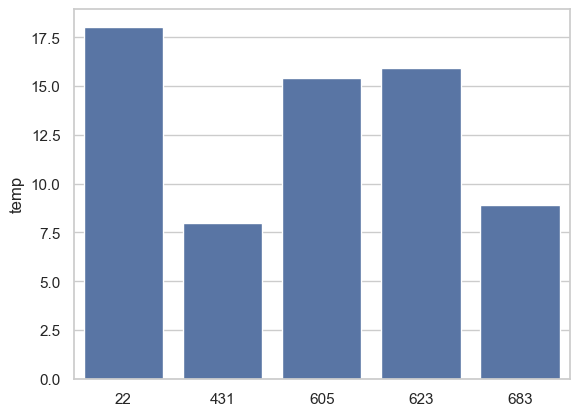

In [783]:
# look at the rented bikes by temp
cnt = df['cnt'].groupby(df.temp).sum().sort_values(ascending=True)
sns.barplot(x=cnt.head().values, y=cnt.head().index)
plt.show()

## Multivariate Analysis

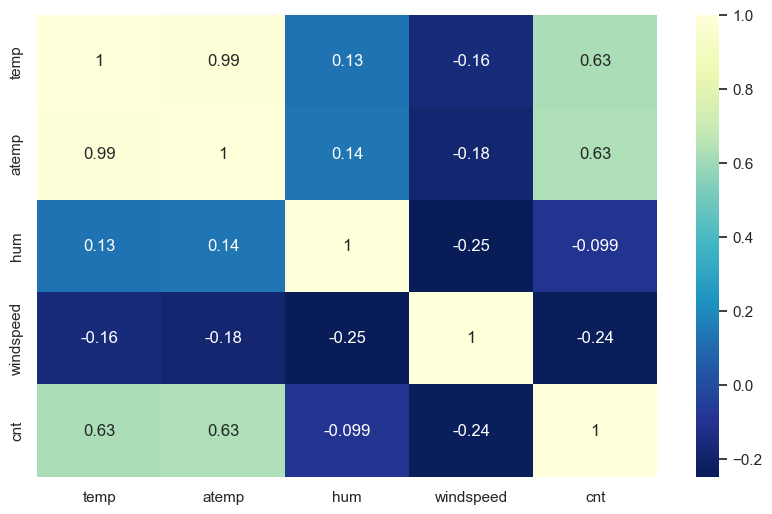

In [784]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(),annot=True,cmap="YlGnBu_r")
plt.show()

In [785]:
dfAnalysis=df

In [786]:
# Encoding categorical variables using one-hot encoding
dfAnalysis = pd.get_dummies(df, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True, dtype=int)

# Display the first few rows to confirm encoding
dfAnalysis.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LightSnow,weathersit_MistCloudy
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [787]:
dfAnalysis.shape

(730, 30)

In [788]:
dfAnalysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    object 
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    int32  
 9   season_summer          730 non-null    int32  
 10  season_winter          730 non-null    int32  
 11  mnth_aug               730 non-null    int32  
 12  mnth_dec               730 non-null    int32  
 13  mnth_feb               730 non-null    int32  
 14  mnth_jan               730 non-null    int32  
 15  mnth_j

## Linear Regression

In [789]:
# importing libraries for linear regression
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score,mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

import statsmodels.api as sm

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [790]:
#y to contain only target variable
y=dfAnalysis.pop('cnt')

#X is all variables except cnt
X=dfAnalysis

#Train Test split with 70:30 ratio, keeping random_size to a constant value so that train, test size are same throughout the analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [791]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 510 entries, 653 to 79
Series name: cnt
Non-Null Count  Dtype
--------------  -----
510 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB


In [792]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     510 non-null    object 
 1   holiday                510 non-null    int64  
 2   workingday             510 non-null    int64  
 3   temp                   510 non-null    float64
 4   atemp                  510 non-null    float64
 5   hum                    510 non-null    float64
 6   windspeed              510 non-null    float64
 7   season_spring          510 non-null    int32  
 8   season_summer          510 non-null    int32  
 9   season_winter          510 non-null    int32  
 10  mnth_aug               510 non-null    int32  
 11  mnth_dec               510 non-null    int32  
 12  mnth_feb               510 non-null    int32  
 13  mnth_jan               510 non-null    int32  
 14  mnth_jul               510 non-null    int32  
 15  mnth_jun  

In [793]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     219 non-null    object 
 1   holiday                219 non-null    int64  
 2   workingday             219 non-null    int64  
 3   temp                   219 non-null    float64
 4   atemp                  219 non-null    float64
 5   hum                    219 non-null    float64
 6   windspeed              219 non-null    float64
 7   season_spring          219 non-null    int32  
 8   season_summer          219 non-null    int32  
 9   season_winter          219 non-null    int32  
 10  mnth_aug               219 non-null    int32  
 11  mnth_dec               219 non-null    int32  
 12  mnth_feb               219 non-null    int32  
 13  mnth_jan               219 non-null    int32  
 14  mnth_jul               219 non-null    int32  
 15  mnth_jun  

In [794]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LightSnow,weathersit_MistCloudy
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### scaling

In [795]:
num_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [796]:
num_cols_new = ['temp', 'atemp', 'hum', 'windspeed']

In [797]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LightSnow,weathersit_MistCloudy
653,2019,0,1,19.201653,23.0423,55.8333,12.208807,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,2019,0,1,29.246653,33.1448,70.4167,11.083475,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,2019,0,0,16.980847,20.6746,62.1250,10.792293,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,2019,0,0,10.489153,11.5850,48.3333,23.500518,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,2019,0,0,15.443347,18.8752,48.9583,8.708325,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [798]:
scaler = MinMaxScaler()

In [799]:
# Apply scaler() 
X_train[num_cols_new] = scaler.fit_transform(X_train[num_cols_new])

In [800]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LightSnow,weathersit_MistCloudy
653,2019,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,2019,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,2019,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,2019,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,2019,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [801]:
X_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LightSnow,weathersit_MistCloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.243137,0.245098,0.24902,0.096078,...,0.086275,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.429398,0.430568,0.43287,0.294988,...,0.281045,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


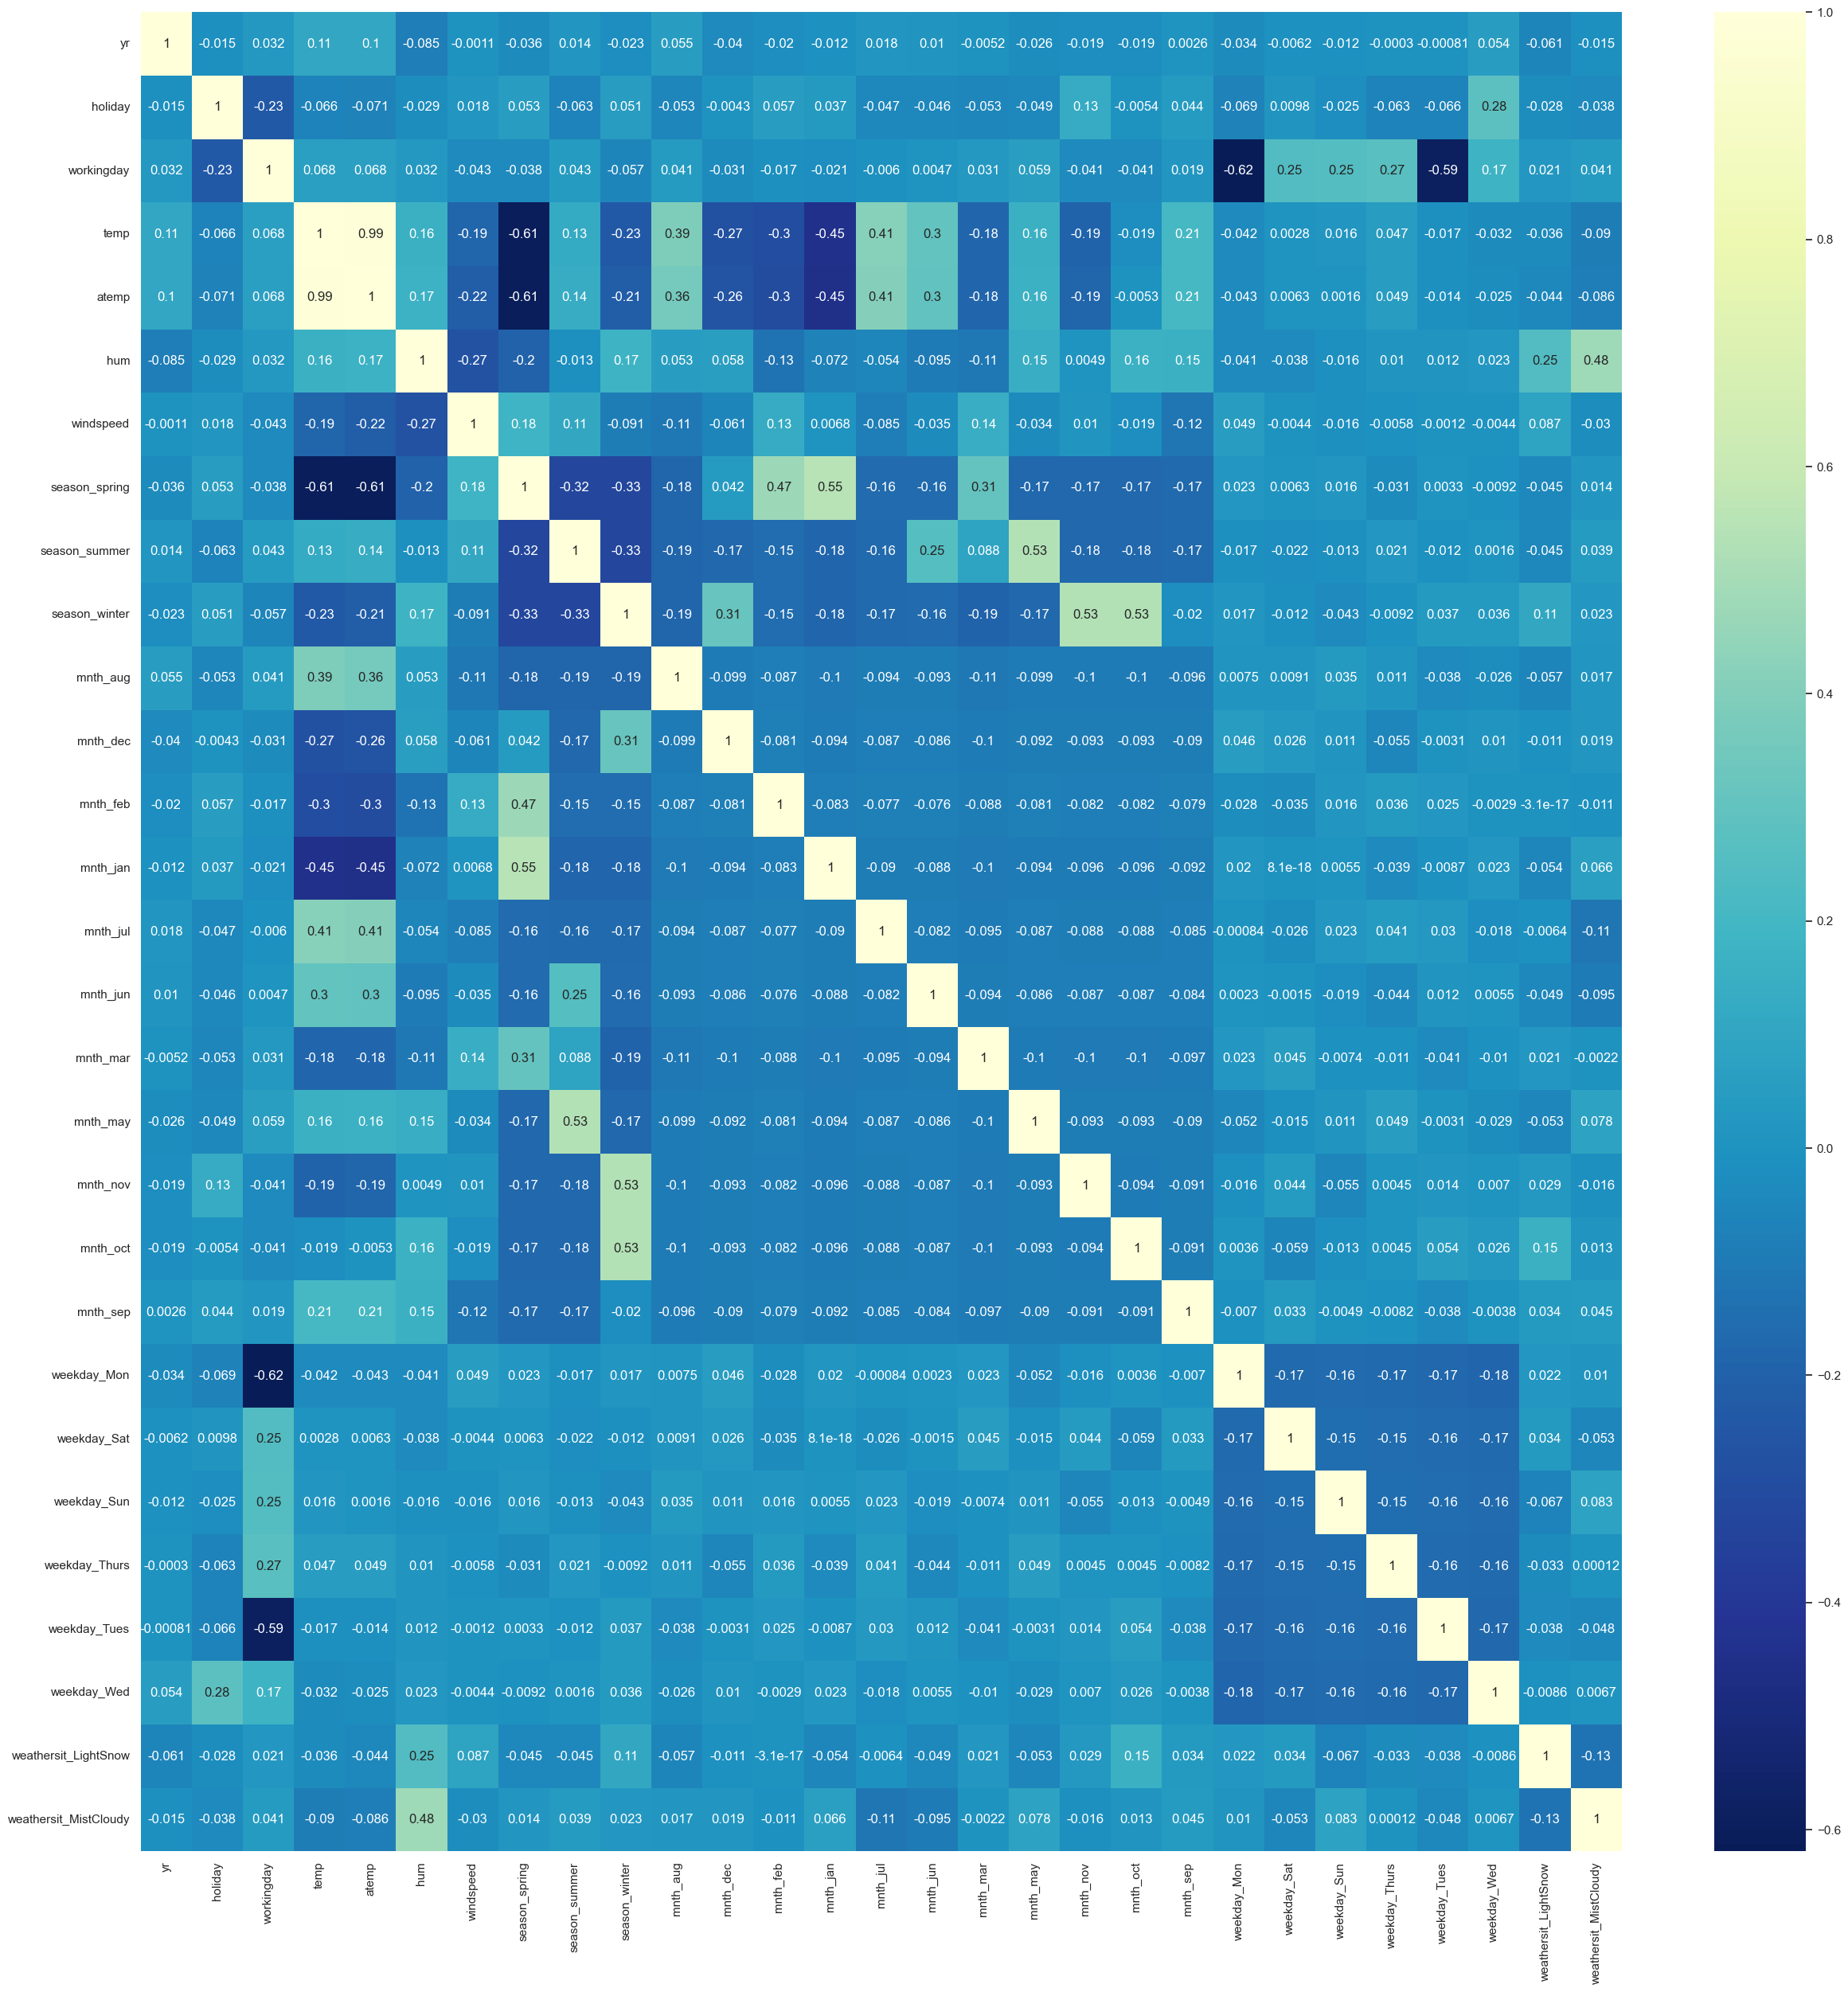

In [802]:
plt.figure(figsize = (30, 30))
sns.heatmap(X_train.corr(), annot=True,cmap="YlGnBu_r")
plt.show()

### Linear Regression

In [803]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_LightSnow,weathersit_MistCloudy
653,2019,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,1,0,0,0,0
576,2019,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,2019,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,2019,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,2019,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [804]:
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [805]:
#add a constant (intercept)
X_train_sm = sm.add_constant(X_train['temp'])

#create first model
lr = sm.OLS(y_train, X_train_sm)

#fit;
lr_model = lr.fit()

#params
lr_model.params

const    1497.882426
temp     5562.458744
dtype: float64

In [806]:
#checking model summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           5.80e-61
Time:                        02:21:47   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1497.8824    171.056      8.757      0.000    1161.819    1833.946
temp        5562.4587    293.549     18.949      0.000    4985.738    6139.179
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [807]:
# R-square is .41 which means 41% of the variance in the count quantity is explained by temp

In [808]:
# Running RFE with the output number of the variable equal to 15

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [809]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 14),
 ('season_winter', True, 1),
 ('mnth_aug', False, 5),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 6),
 ('mnth_mar', False, 9),
 ('mnth_may', False, 15),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 8),
 ('mnth_sep', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', False, 10),
 ('weekday_Thurs', False, 13),
 ('weekday_Tues', True, 1),
 ('weekday_Wed', False, 12),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_MistCloudy', True, 1)]

In [810]:
# build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lr = sm.OLS(y_train, X_train_sm.astype(float)).fit()
    print(lr.summary())
    return lr

In [811]:
#calculate VIF
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values.astype(float), i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [812]:
# columns selected by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sep',
       'weekday_Mon', 'weekday_Tues', 'weathersit_LightSnow',
       'weathersit_MistCloudy'],
      dtype='object')

In [813]:
# columns not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Wed'],
      dtype='object')

In [814]:
# Taking 15 columns selected by RFE
cols=['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_jul', 'mnth_sep', 'weekday_Mon', 'weekday_Tues',
       'weathersit_LightSnow', 'weathersit_MistCloudy']
X_train_rfe = X_train[cols]

In [815]:
X_train_rfe.shape

(510, 15)

In [816]:
#Model 1
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.74e-189
Time:                        02:21:47   Log-Likelihood:                -4113.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.237e+

In [817]:
# Dropping atemp is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_jul', 'mnth_sep', 'weekday_Mon', 'weekday_Tues',
       'weathersit_LightSnow', 'weathersit_MistCloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.81e-190
Time:                        02:21:47   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.236e+

In [818]:
# Dropping workingday as it has high VIF indicating multicollinearity
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_jul', 'mnth_sep', 'weekday_Mon', 'weekday_Tues',
       'weathersit_LightSnow', 'weathersit_MistCloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.81e-190
Time:                        02:21:47   Log-Likelihood:                -4114.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     496   BIC:                             8316.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.044e+

In [819]:
# Dropping weekday_Mon as VIF is high and p value is high indicating that the variable is insignificant
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_jul', 'mnth_sep', 'weekday_Tues',
       'weathersit_LightSnow', 'weathersit_MistCloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          3.64e-191
Time:                        02:21:47   Log-Likelihood:                -4114.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     497   BIC:                             8310.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -4.04e+

In [820]:
# hum has negative coefficient and its VIF is also high, so dropping it
cols = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_jul', 'mnth_sep', 'weekday_Tues',
       'weathersit_LightSnow', 'weathersit_MistCloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.8
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.60e-189
Time:                        02:21:47   Log-Likelihood:                -4122.5
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     498   BIC:                             8320.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.102e+

In [821]:
# dropping yr as it has high VIF
cols = ['holiday', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_jul', 'mnth_sep', 'weekday_Tues',
       'weathersit_LightSnow', 'weathersit_MistCloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     66.63
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           2.28e-85
Time:                        02:21:47   Log-Likelihood:                -4371.0
No. Observations:                 510   AIC:                             8764.
Df Residuals:                     499   BIC:                             8811.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2784.15

In [822]:
# reintroducing yr as r^2 has dropped, and dropping temp as it has high vif
cols = ['holiday', 'yr', 'windspeed', 'season_spring', 'season_winter', 'mnth_jul', 'weekday_Tues',
       'weathersit_LightSnow', 'weathersit_MistCloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     170.1
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          5.27e-146
Time:                        02:21:47   Log-Likelihood:                -4229.8
No. Observations:                 510   AIC:                             8480.
Df Residuals:                     500   BIC:                             8522.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.338e+

In [823]:
#  dropping mnth_july as it insignificant
cols = ['holiday', 'yr', 'season_spring', 'season_winter', 'weekday_Tues',
       'weathersit_LightSnow', 'weathersit_MistCloudy']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     195.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.00e-139
Time:                        02:21:47   Log-Likelihood:                -4251.5
No. Observations:                 510   AIC:                             8519.
Df Residuals:                     502   BIC:                             8553.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.327e+

In [824]:
cols = ['holiday', 'yr', 'season_spring', 'season_winter', 'weekday_Tues',
       'weathersit_LightSnow', 'weathersit_MistCloudy']

### Residual Analysis

In [825]:
#Build a model with all columns to select features automatically
def model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [826]:
#Build a model using sklearn
lr = model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

-4326590.789244098 [ -887.73856192  2146.26634311 -2572.03932633  -457.72340431
  -447.24283531 -2725.50601273  -793.05600177]


In [827]:
y_train_pred = lr.predict(X_train[cols])

In [828]:
#Plot a histogram
def plot(actual, pred):
    sns.distplot(actual-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

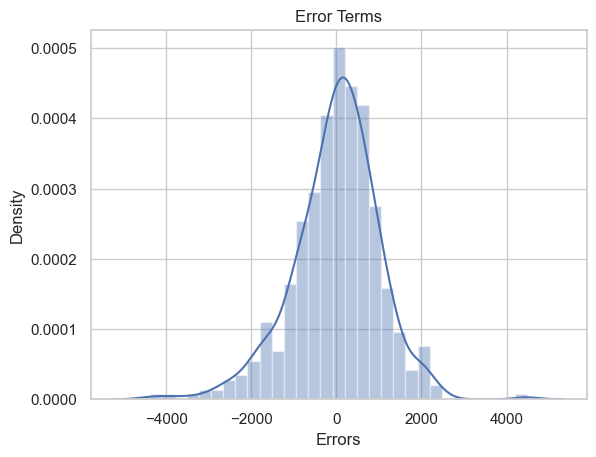

In [829]:
plot(y_train, y_train_pred)

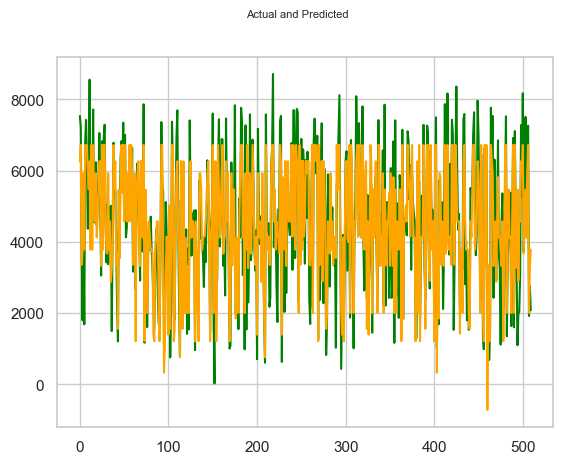

In [830]:
# Actual and Predicted
plt.plot([i for i in range(0,len(X_train),1)],y_train, color="green")
plt.plot([i for i in range(0,len(X_train),1)],y_train_pred, color="orange")
plt.suptitle('Actual and Predicted', fontsize = 8)
plt.show()

### Model predictions

In [831]:
# R-square Value
r2_score(y_train,y_train_pred)

0.7320180711643869

### On test dataset

In [832]:
#Test data to be transformed
X_test[num_cols_new] = scaler.transform(X_test[num_cols_new])

In [833]:
#Predicting test data
y_test_pred = lr.predict(X_test[cols])
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.7405225267429378

### evaluating the model

In [834]:
# evaluating the model based on r2_score
y_pred=y_test_pred
r2_score(y_test, y_pred)

0.7405225267429378

Text(0, 0.5, 'y_pred')

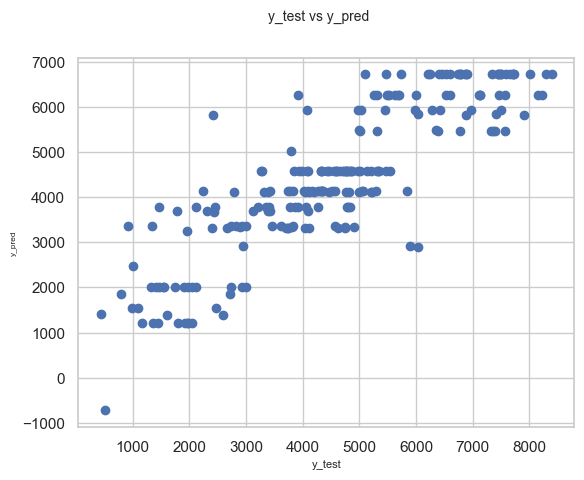

In [835]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 10)             
plt.xlabel('y_test', fontsize = 8)                          
plt.ylabel('y_pred', fontsize = 6) 

In [836]:
#Build model using manual + rfe approach 
lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     195.9
Date:                Wed, 26 Jun 2024   Prob (F-statistic):          4.00e-139
Time:                        02:21:49   Log-Likelihood:                -4251.5
No. Observations:                 510   AIC:                             8519.
Df Residuals:                     502   BIC:                             8553.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.327e+

In [1]:
# As a result, significant variables to predict the demand for bikes rented are:
#    yr
#    weathersit ->Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#    weathersit ->Light Snow, Light Rain + Thunderstorm + Scattered clouds
#    season->winter 
#    season->spring
#    weekday->Tues: 0
#    holiday
